### Reading Points of Intrest from OSM

Guide: https://pyrosm.readthedocs.io/en/latest/basics.html#read-points-of-interest

In [ ]:
# NB - will not work if run for a large area (e.g. england)
# instead, run this code as a script on a high memory machine: query_osm.py

In [1]:
from pyrosm import OSM
from pyrosm import get_data
import pandas as pd
import geopandas as gpd

/Users/lizavabistsevits/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/Users/lizavabistsevits/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
fp = get_data("bristol") # use england here
osm = OSM(fp)

In [3]:
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

/Users/lizavabistsevits/opt/anaconda3/lib/python3.8/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


In [4]:
# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

### Filtering out charities

In [5]:
# Display max 100 columns
pd.set_option('display.max_columns', 100)

# Filter charities
charities_osm = pois.loc[pois['poi_type']=='charity']
charities_osm.head()

,version,changeset,id,lat,tags,timestamp,lon,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,website,amenity,atm,bicycle_parking,bar,building,cafe,drinking_water,fuel,internet_access,library,office,parking,social_facility,source,start_date,wikipedia,alcohol,bicycle,bookmaker,books,car,clothes,fabric,medical_supply,music,religion,second_hand,shoes,shop,trade,wholesale,geometry,osm_type,url,bank,building:levels,car_rental,car_wash,charging_station,clinic,doctors,fountain,gambling,hospital,landuse,pub,school,collector,craft,furniture,houseware,massage,motorcycle,musical_instrument,organic,pet,photo,video,water,poi_type
1280,0,0.0,926689753,51.496471,"{""fixme"":""location""}",0,-2.662182,None,None,None,None,None,None,None,None,Barnardos,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,charity,None,None,POINT (-2.66218 51.49647),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charity
4805,0,0.0,3797513188,51.434635,None,0,-2.567000,None,None,None,None,None,None,None,None,St Peter's Hospice Clearance Shop,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,charity,None,None,POINT (-2.56700 51.43464),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charity
4947,0,0.0,3902026611,51.360676,"{""brand"":""Mind"",""brand:wikidata"":""Q3314763"",""b...",0,-2.925935,None,None,None,None,None,None,None,None,Mind,None,Mind,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,charity,None,None,POINT (-2.92594 51.36068),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charity
5674,0,0.0,4440646675,51.436672,None,0,-2.851166,None,None,None,None,None,None,None,None,CLIC Sargent,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,charity,None,None,POINT (-2.85117 51.43667),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charity
5721,0,0.0,4478139243,51.493195,"{""addr:suburb"":""Emmersons Green"",""addr:unit"":""...",0,-2.476599,Bristol,None,None,The Village,BS16 7AE,None,Emerson Way,None,Sue Ryder,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,charity,None,None,POINT (-2.47660 51.49319),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charity


In [6]:
# Choose columns
charity_filtered = charities_osm[['lat', 'lon', 'name','tags', 'geometry']]

# Filter all None values
charity_filtered = charity_filtered[charity_filtered['tags'].notnull()]

# Reset indices
charity_filtered = charity_filtered.reset_index()

charity_filtered

,index,lat,lon,name,tags,geometry
0,1280,51.496471,-2.662182,Barnardos,"{""fixme"":""location""}",POINT (-2.66218 51.49647)
1,4947,51.360676,-2.925935,Mind,"{""brand"":""Mind"",""brand:wikidata"":""Q3314763"",""b...",POINT (-2.92594 51.36068)
2,5721,51.493195,-2.476599,Sue Ryder,"{""addr:suburb"":""Emmersons Green"",""addr:unit"":""...",POINT (-2.47660 51.49319)
3,8742,51.380089,-2.395865,Rachel's Bath Community Shop,"{""facebook"":""https://www.facebook.com/BathComm...",POINT (-2.39587 51.38009)
4,10151,51.462910,-2.509170,YMCA,"{""brand"":""YMCA"",""brand:wikidata"":""Q157169"",""br...",POINT (-2.50917 51.46291)
...,...,...,...,...,...,...
97,25527,NaN,NaN,Age UK,"{""brand"":""Age UK"",""brand:wikidata"":""Q4691850"",...","POLYGON ((-2.50752 51.46273, -2.50754 51.46252..."
98,25545,NaN,NaN,Sue Ryder,"{""brand"":""Sue Ryder"",""brand:wikidata"":""Q763427...","POLYGON ((-2.50637 51.46277, -2.50633 51.46277..."
99,26376,NaN,NaN,Mind,"{""brand"":""Mind"",""brand:wikidata"":""Q3314763"",""b...","POLYGON ((-2.85369 51.43600, -2.85360 51.43601..."
100,27829,NaN,NaN,PDSA,"{""brand"":""PDSA"",""brand:wikidata"":""Q7165541"",""b...","POLYGON ((-2.50973 51.46273, -2.50961 51.46271..."


In [7]:
## Create a df with charities without tags in order to join two df later

# Filter all values without tags
charity_notags = charities_osm[charities_osm['tags'].isnull()]

# Choose columns
charity_notags = charity_notags[['lat', 'lon', 'name','tags', 'geometry']]

charity_notags

,lat,lon,name,tags,geometry
4805,51.434635,-2.567000,St Peter's Hospice Clearance Shop,None,POINT (-2.56700 51.43464)
5674,51.436672,-2.851166,CLIC Sargent,None,POINT (-2.85117 51.43667)
6954,51.496975,-2.558791,Barnardo's,None,POINT (-2.55879 51.49697)
9581,51.522842,-2.507510,St Peter's Hospice Shop,None,POINT (-2.50751 51.52284)
9589,51.523754,-2.508835,Break,None,POINT (-2.50883 51.52375)
...,...,...,...,...,...
24046,NaN,NaN,Break,None,"POLYGON ((-2.75543 51.43376, -2.75542 51.43379..."
24948,NaN,NaN,Bath Women's Refuge,None,"POLYGON ((-2.35907 51.38740, -2.35908 51.38735..."
25511,NaN,NaN,St Peter's Hospice,None,"POLYGON ((-2.51096 51.46309, -2.51094 51.46315..."
25533,NaN,NaN,St Peter's Hospice,None,"POLYGON ((-2.50704 51.46266, -2.50700 51.46266..."


In [8]:
# Show one row
charity_filtered['tags'][2]

'{"addr:suburb":"Emmersons Green","addr:unit":"1","source:addr":"FHRS Open Data"}'

In [9]:
# Convert string 'tags' to JSON objects
import json
charity_filtered["tags"] = charity_filtered["tags"].apply(json.loads)

In [10]:
# Convert JSON 'tags' to columns
charity_tags = pd.json_normalize(charity_filtered["tags"])
charity_tags

,fixme,brand,brand:wikidata,brand:wikipedia,addr:suburb,addr:unit,source:addr,facebook,source:outline,roof:levels,roof:shape,wheelchair,branch,fhrs:id,films,long_name,addr:town,name:etymology:wikidata,addr:county,disused:fhrs:id,disused:name,disused:shop,disused:website,wikidata,addr:terrace,addr:village,toilets:wheelchair,addr:district,level
0,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Mind,Q3314763,en:Mind (charity),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Emmersons Green,1,FHRS Open Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/BathCommunityShop/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,YMCA,Q157169,en:YMCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,NaN,Age UK,Q4691850,en:Age UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,Sue Ryder,Q7634271,en:Sue Ryder (charity),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,Mind,Q3314763,en:Mind (charity),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,PDSA,Q7165541,en:People's Dispensary for Sick Animals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Choose columns
charity_tags_filtered = charity_tags[['brand', 'brand:wikidata', 'addr:suburb']] # brand:wikidata is a unique code for shops/chains in osm world
charity_tags_filtered

,brand,brand:wikidata,addr:suburb
0,NaN,NaN,NaN
1,Mind,Q3314763,NaN
2,NaN,NaN,Emmersons Green
3,NaN,NaN,NaN
4,YMCA,Q157169,NaN
...,...,...,...
97,Age UK,Q4691850,NaN
98,Sue Ryder,Q7634271,NaN
99,Mind,Q3314763,NaN
100,PDSA,Q7165541,NaN


In [12]:
# Join tags with df
charity_joined = pd.concat([charity_filtered, charity_tags_filtered], axis=1)
charity_joined.head()


,index,lat,lon,name,tags,geometry,brand,brand:wikidata,addr:suburb
0,1280,51.496471,-2.662182,Barnardos,{'fixme': 'location'},POINT (-2.66218 51.49647),NaN,NaN,NaN
1,4947,51.360676,-2.925935,Mind,"{'brand': 'Mind', 'brand:wikidata': 'Q3314763'...",POINT (-2.92594 51.36068),Mind,Q3314763,NaN
2,5721,51.493195,-2.476599,Sue Ryder,"{'addr:suburb': 'Emmersons Green', 'addr:unit'...",POINT (-2.47660 51.49319),NaN,NaN,Emmersons Green
3,8742,51.380089,-2.395865,Rachel's Bath Community Shop,{'facebook': 'https://www.facebook.com/BathCom...,POINT (-2.39587 51.38009),NaN,NaN,NaN
4,10151,51.462910,-2.509170,YMCA,"{'brand': 'YMCA', 'brand:wikidata': 'Q157169',...",POINT (-2.50917 51.46291),YMCA,Q157169,NaN


In [13]:
# Without None values in brand, wikidata and suburb -> this should filter all the odd datapoints, but some duplicates can still exist
charity_joined_filtered = charity_joined[charity_joined['brand'].notnull() | 
                                         charity_joined['brand:wikidata'].notnull() |
                                         charity_joined['addr:suburb'].notnull()]
charity_joined_filtered.tail()

,index,lat,lon,name,tags,geometry,brand,brand:wikidata,addr:suburb
97,25527,NaN,NaN,Age UK,"{'brand': 'Age UK', 'brand:wikidata': 'Q469185...","POLYGON ((-2.50752 51.46273, -2.50754 51.46252...",Age UK,Q4691850,NaN
98,25545,NaN,NaN,Sue Ryder,"{'brand': 'Sue Ryder', 'brand:wikidata': 'Q763...","POLYGON ((-2.50637 51.46277, -2.50633 51.46277...",Sue Ryder,Q7634271,NaN
99,26376,NaN,NaN,Mind,"{'brand': 'Mind', 'brand:wikidata': 'Q3314763'...","POLYGON ((-2.85369 51.43600, -2.85360 51.43601...",Mind,Q3314763,NaN
100,27829,NaN,NaN,PDSA,"{'brand': 'PDSA', 'brand:wikidata': 'Q7165541'...","POLYGON ((-2.50973 51.46273, -2.50961 51.46271...",PDSA,Q7165541,NaN
101,27831,NaN,NaN,British Heart Foundation,"{'brand': 'British Heart Foundation', 'brand:w...","POLYGON ((-2.50941 51.46269, -2.50926 51.46267...",British Heart Foundation,Q4970039,NaN


In [14]:
# Join two df (with tags and no tags)

charities = pd.concat([charity_joined_filtered, charity_notags])

charities

,index,lat,lon,name,tags,geometry,brand,brand:wikidata,addr:suburb
1,4947.0,51.360676,-2.925935,Mind,"{'brand': 'Mind', 'brand:wikidata': 'Q3314763'...",POINT (-2.92594 51.36068),Mind,Q3314763,NaN
2,5721.0,51.493195,-2.476599,Sue Ryder,"{'addr:suburb': 'Emmersons Green', 'addr:unit'...",POINT (-2.47660 51.49319),NaN,NaN,Emmersons Green
4,10151.0,51.462910,-2.509170,YMCA,"{'brand': 'YMCA', 'brand:wikidata': 'Q157169',...",POINT (-2.50917 51.46291),YMCA,Q157169,NaN
5,11722.0,51.434422,-2.568983,YMCA,"{'brand': 'YMCA', 'brand:wikidata': 'Q157169',...",POINT (-2.56898 51.43442),YMCA,Q157169,NaN
9,13526.0,NaN,NaN,Age UK,"{'brand': 'Age UK', 'brand:wikidata': 'Q469185...","POLYGON ((-2.59558 51.44259, -2.59581 51.44271...",Age UK,Q4691850,NaN
...,...,...,...,...,...,...,...,...,...
24046,NaN,NaN,NaN,Break,None,"POLYGON ((-2.75543 51.43376, -2.75542 51.43379...",NaN,NaN,NaN
24948,NaN,NaN,NaN,Bath Women's Refuge,None,"POLYGON ((-2.35907 51.38740, -2.35908 51.38735...",NaN,NaN,NaN
25511,NaN,NaN,NaN,St Peter's Hospice,None,"POLYGON ((-2.51096 51.46309, -2.51094 51.46315...",NaN,NaN,NaN
25533,NaN,NaN,NaN,St Peter's Hospice,None,"POLYGON ((-2.50704 51.46266, -2.50700 51.46266...",NaN,NaN,NaN


### Creating coordinates from geometry

In [15]:
# Convert polygons to points

charity_points = charities.copy()

# Change geometry 
charity_points['geometry'] = charity_points['geometry'].centroid
charity_points

<ipython-input-15-08e526385198>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  charity_points['geometry'] = charity_points['geometry'].centroid


,index,lat,lon,name,tags,geometry,brand,brand:wikidata,addr:suburb
1,4947.0,51.360676,-2.925935,Mind,"{'brand': 'Mind', 'brand:wikidata': 'Q3314763'...",POINT (-2.92594 51.36068),Mind,Q3314763,NaN
2,5721.0,51.493195,-2.476599,Sue Ryder,"{'addr:suburb': 'Emmersons Green', 'addr:unit'...",POINT (-2.47660 51.49319),NaN,NaN,Emmersons Green
4,10151.0,51.462910,-2.509170,YMCA,"{'brand': 'YMCA', 'brand:wikidata': 'Q157169',...",POINT (-2.50917 51.46291),YMCA,Q157169,NaN
5,11722.0,51.434422,-2.568983,YMCA,"{'brand': 'YMCA', 'brand:wikidata': 'Q157169',...",POINT (-2.56898 51.43442),YMCA,Q157169,NaN
9,13526.0,NaN,NaN,Age UK,"{'brand': 'Age UK', 'brand:wikidata': 'Q469185...",POINT (-2.59563 51.44269),Age UK,Q4691850,NaN
...,...,...,...,...,...,...,...,...,...
24046,NaN,NaN,NaN,Break,None,POINT (-2.75550 51.43377),NaN,NaN,NaN
24948,NaN,NaN,NaN,Bath Women's Refuge,None,POINT (-2.35911 51.38738),NaN,NaN,NaN
25511,NaN,NaN,NaN,St Peter's Hospice,None,POINT (-2.51099 51.46307),NaN,NaN,NaN
25533,NaN,NaN,NaN,St Peter's Hospice,None,POINT (-2.50701 51.46257),NaN,NaN,NaN


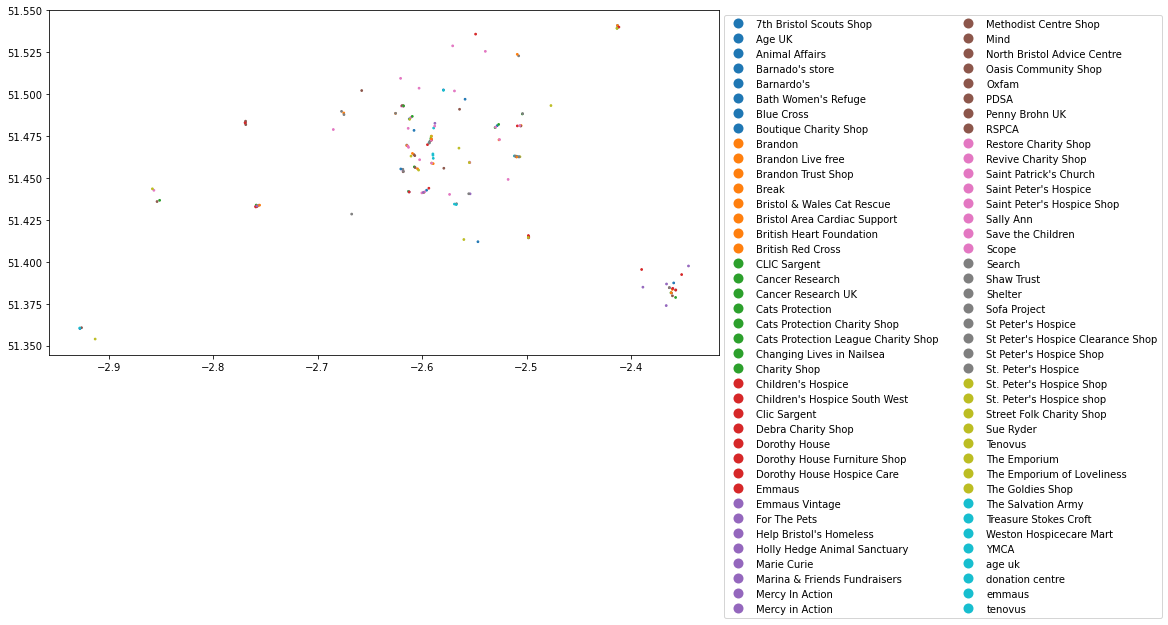

In [16]:
# Visualise 
ax = charity_points.plot(column='name', markersize=3, figsize=(12,12), 
                         legend=True, legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))


In [17]:
# Manually change the names
#charity_points.name[charity_points.name == "Saint Peter's Hospice"] = "St Peter's Hospice Shop"

In [18]:
# Convert points into lat, lon coordinates

charity_coords = charity_points.copy()

charity_coords['lon'] = charity_coords.geometry.x
charity_coords['lat'] = charity_coords.geometry.y

charity_coords

,index,lat,lon,name,tags,geometry,brand,brand:wikidata,addr:suburb
1,4947.0,51.360676,-2.925935,Mind,"{'brand': 'Mind', 'brand:wikidata': 'Q3314763'...",POINT (-2.92594 51.36068),Mind,Q3314763,NaN
2,5721.0,51.493195,-2.476599,Sue Ryder,"{'addr:suburb': 'Emmersons Green', 'addr:unit'...",POINT (-2.47660 51.49319),NaN,NaN,Emmersons Green
4,10151.0,51.462910,-2.509170,YMCA,"{'brand': 'YMCA', 'brand:wikidata': 'Q157169',...",POINT (-2.50917 51.46291),YMCA,Q157169,NaN
5,11722.0,51.434422,-2.568983,YMCA,"{'brand': 'YMCA', 'brand:wikidata': 'Q157169',...",POINT (-2.56898 51.43442),YMCA,Q157169,NaN
9,13526.0,51.442686,-2.595631,Age UK,"{'brand': 'Age UK', 'brand:wikidata': 'Q469185...",POINT (-2.59563 51.44269),Age UK,Q4691850,NaN
...,...,...,...,...,...,...,...,...,...
24046,NaN,51.433769,-2.755495,Break,None,POINT (-2.75550 51.43377),NaN,NaN,NaN
24948,NaN,51.387378,-2.359108,Bath Women's Refuge,None,POINT (-2.35911 51.38738),NaN,NaN,NaN
25511,NaN,51.463072,-2.510994,St Peter's Hospice,None,POINT (-2.51099 51.46307),NaN,NaN,NaN
25533,NaN,51.462573,-2.507006,St Peter's Hospice,None,POINT (-2.50701 51.46257),NaN,NaN,NaN


In [19]:
# Save as CSV
#charity_coords.to_csv('charity_coords_OSM_raw.csv')

In [20]:
# Drop duplicate shops
#charity_coords.drop_duplicates(subset=['geometry'])